In [1]:
import pandas as pd
import numpy as np

In [2]:
# get data from csv
data_shop=pd.read_csv("Ntu_Orders.csv",low_memory=False,dtype=str)
data_member=pd.read_csv("NTU_1317_Member.txt",delimiter="\t",low_memory=False)

In [115]:
# pre-processing data
data_member['MinOrderDate']=pd.to_datetime(data_member['MinOrderDate']) 
data_member['RegisterDateTime']=pd.to_datetime(data_member['RegisterDateTime']) 
data_shop["DateId"]=pd.to_datetime(data_shop["DateId"],format="%Y%m%d")
time_expend=["2017-1~2017-2","2017-2~2017-3","2017-3~2017-4","2017-4~2017-5","2017-5~2017-6","2017-6~2017-7","2017-7~2017-8","2017-8~2017-9","2017-9~2017-10","2017-10~2017-11","2017-11~2017-12","2017-12~2018-1"]

In [116]:
def RegisterCustumer():
    di=data_member.ix[:,["MemberId","MinOrderDate","RegisterDateTime"]]
    monthlyMember_Register=[]
    monthlyMember_MinOrderDate=[]
    monthlyMember_all=[]
    for ele in time_expend:
        time=ele.split("~")
        temp=di[di["MinOrderDate"]>=time[0]]
        monthlyMember_MinOrderDate.append(list(temp[temp["MinOrderDate"]<time[1]]["MemberId"]))
        temp=di[di["RegisterDateTime"]>=time[0]]
        monthlyMember_Register.append(list(temp[temp["RegisterDateTime"]<time[1]]["MemberId"]))
        monthlyMember_all.append(list(di[di["RegisterDateTime"]<time[1]]["MemberId"]))
    monthlyMember_MinOrderDate.append(list(di[di["MinOrderDate"]<"2017-1-1"]["MemberId"]))
    monthlyMember_Register.append(list(di[di["RegisterDateTime"]<"2017-1-1"]["MemberId"]))
    return monthlyMember_Register,monthlyMember_MinOrderDate,monthlyMember_all

def ShopCustumer():
    di=data_shop.ix[:,["MemberId","DateId","SalesOrderSlaveTotalPayment"]]
    monthlyShoping_DateId=[]
    for ele in time_expend:
        time=ele.split("~")
        temp=di[di["DateId"]>time[0]]
        monthlyShoping_DateId.append(list(temp[temp["DateId"]<time[1]]["MemberId"]))
    return monthlyShoping_DateId

In [117]:
monthlyMember_Register,monthlyMember_MinOrderDate,monthlyMember_all=RegisterCustumer()
monthlyShoping_DateId=ShopCustumer()

## monthly：

      register-->  monthlyMember_Register[0:-2]
      
       shoping-->  monthlyShoping_DateId[:]
       
        naping-->  monthlyMember_Register[-1]-monthlyShoping_DateId[0],monlyShoping_DateId[0]-monlyShoping_DateId[1]
        
      sleeping-->  0,naping[0]-monthlyShoping_DateId[1]

In [120]:
register=[]
shoping=[]
naping=[]
sleeping=[]
monthly_naping=[]
monthly_sleeping=[]
for i in range(0,12):
    shoping.append(len(monthlyShoping_DateId[i]))
    if i==0:
        register.append(len(monthlyMember_Register[i]))
        naping.append(len(set(monthlyMember_Register[-1])-set(monthlyShoping_DateId[0])))
        monthly_naping.append(set(monthlyMember_Register[-1])-set(monthlyShoping_DateId[0]))
        sleeping.append(0)
    else:
        register.append(len(monthlyMember_Register[i]))
        naping.append(len(set(monthlyShoping_DateId[i-1])-set(monthlyShoping_DateId[i])))
        monthly_naping.append(set(monthlyShoping_DateId[i-1])-set(monthlyShoping_DateId[i]))
        monthly_sleeping.append(set(monthlyMember_all[i])-set(monthlyShoping_DateId[i])-set(monthly_naping[i])-set(monthlyMember_Register[i]))
        sleeping.append(len(set(monthlyMember_all[i])-set(monthlyShoping_DateId[i])-set(monthly_naping[i])-set(monthlyMember_Register[i])))

register has a bug

In [199]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
def barsplot():
    fig=plt.figure(figsize=(15,20))
    x=[x for x in range(1,13)]
#     x1=[x for x in range(1,13)]
    y1=np.array(register)
#     x2=[x for x in range(1,13)]
    y2=np.array(shoping)
#     x3=[x for x in range(1,13)]
    y3=np.array(naping)
#     x4=[x for x in range(1,13)]
    y4=np.array(sleeping)
#     l4=plt.bar(x4,y4,color='b',width=0.4)
#     l3=plt.bar(x3,y3,color='g',width=0.4)
#     l2=plt.bar(x2,y2,color='r',width=0.4)
#     l1=plt.bar(x1,y1,color='y',width=0.4)
    l1=plt.bar(x, y1, color='green', label='y1')
    l2=plt.bar(x, y2, bottom=y1, color='red', label='y2')
    l3=plt.bar(x, y3, bottom=y1+y2, color='blue', label='y3')
    l4=plt.bar(x, y4, bottom=y1+y2+y3, color='y', label='y4')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Custumer Classify")
    plt.legend(handles = [l1,l2,l3,l4], labels = ["register","shoping","naping","sleeping"],loc="best")
    for x,x,x,x,y1,y2,y3,y4 in zip(x,x,x,x,y1,y2,y3,y4):
        plt.text(x ,y1, "%.0f" % y1, ha="center",va="center")
        plt.text(x ,y2+y1, "%.0f" % y2, ha="center",va="center")
        plt.text(x ,y2+y1+y3, "%.0f" % y3, ha="center",va="center")
        plt.text(x, y2+y1+y3+y4, "%.0f" % y4, ha="center",va="center")
#         plt.text(x ,y1/2, "R", ha="center",va="center")
#         plt.text(x ,y1+y2/2,"S", ha="center",va="center")
#         plt.text(x ,y2+y1+y3/2,"N", ha="center",va="center")
#         plt.text(x ,y2+y1+y3+y4/2,"S", ha="center",va="center")
    plt.show()

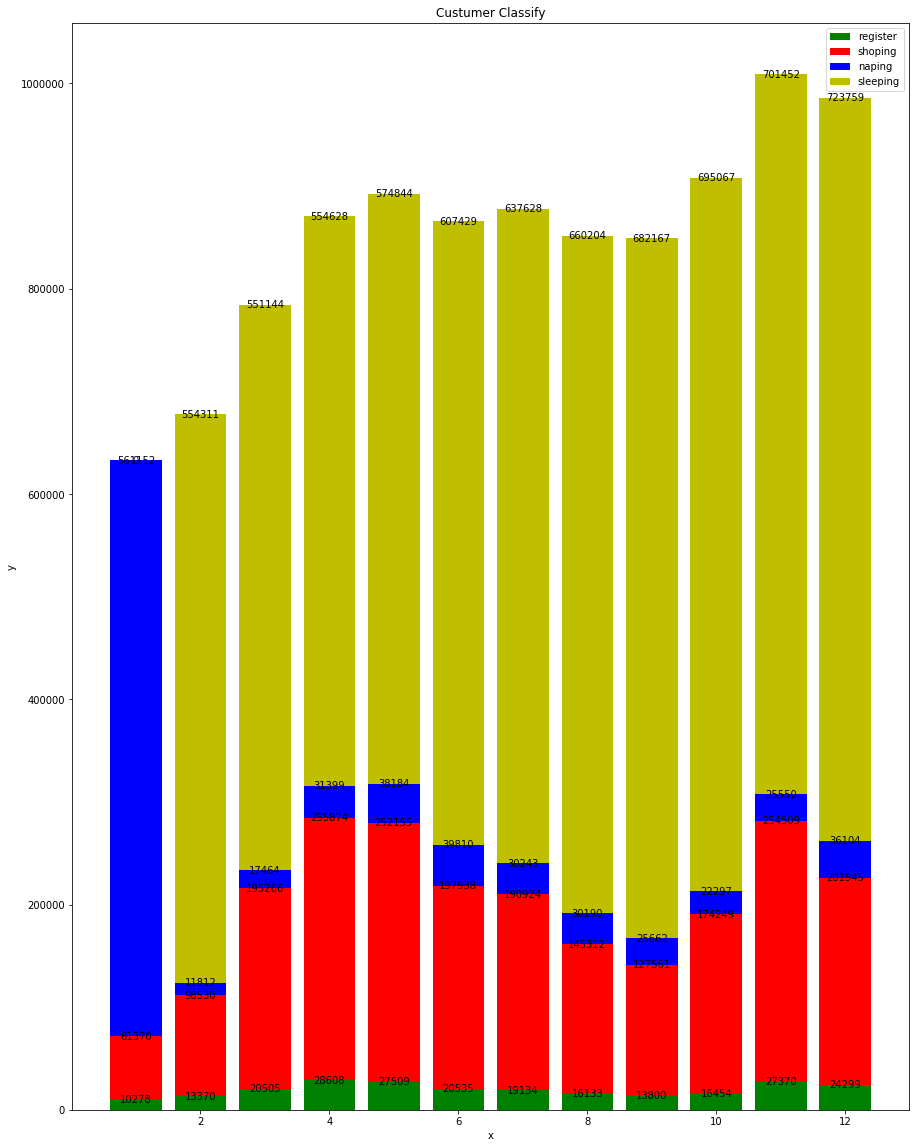

In [200]:
draw=barsplot()

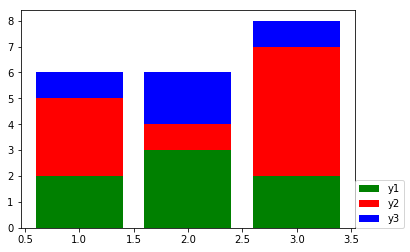

In [156]:
# x = [1, 2, 3]
# y1 = np.array([2, 3, 2])
# y2 = np.array([3, 1, 5])
# y3 = np.array([1, 2, 1])
# plt.bar(x, y1, color='green', label='y1')
# plt.bar(x, y2, bottom=y1, color='red', label='y2')
# plt.bar(x, y3, bottom=y1+y2, color='blue', label='y3')
# plt.legend(loc=[1, 0])
# plt.show()

In [121]:
# print(register)
# print(shoping)
# print(naping)
# print(sleeping)

[10278, 13370, 20505, 28608, 27509, 20535, 19134, 16133, 13800, 16454, 27370, 24299]
[61370, 98530, 195266, 255874, 252155, 197938, 190924, 145312, 127561, 174249, 254509, 201945]
[561152, 11812, 17464, 31399, 38184, 39810, 30243, 30190, 25662, 22297, 25550, 36104]
[0, 554311, 551144, 554628, 574844, 607429, 637628, 660204, 682167, 695067, 701452, 723759]
